In [1]:
# Importing necessary libraries
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Time Series Analysis
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults
from statsmodels.tsa.holtwinters import ExponentialSmoothing, HoltWintersResults
from statsmodels.tsa.vector_ar.var_model import VAR
from pmdarima import auto_arima

# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler


In [2]:
# Load and preprocess the data
file_path = 'Dataset/all_commodities_data.csv'
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data['date'])
data.sort_values('date', inplace=True)


In [3]:
# Function for the Augmented Dickey-Fuller Test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    return {
        'Test Statistic': result[0],
        'p-value': result[1],
        'Lags Used': result[2],
        'Number of Observations Used': result[3],
        'Critical Values': result[4]
    }

C:\Users\zhizh\AppData\Local\Temp\ipykernel_6248\2525914946.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  commodity_monthly = commodity_data.resample('M').mean()['close'].dropna()


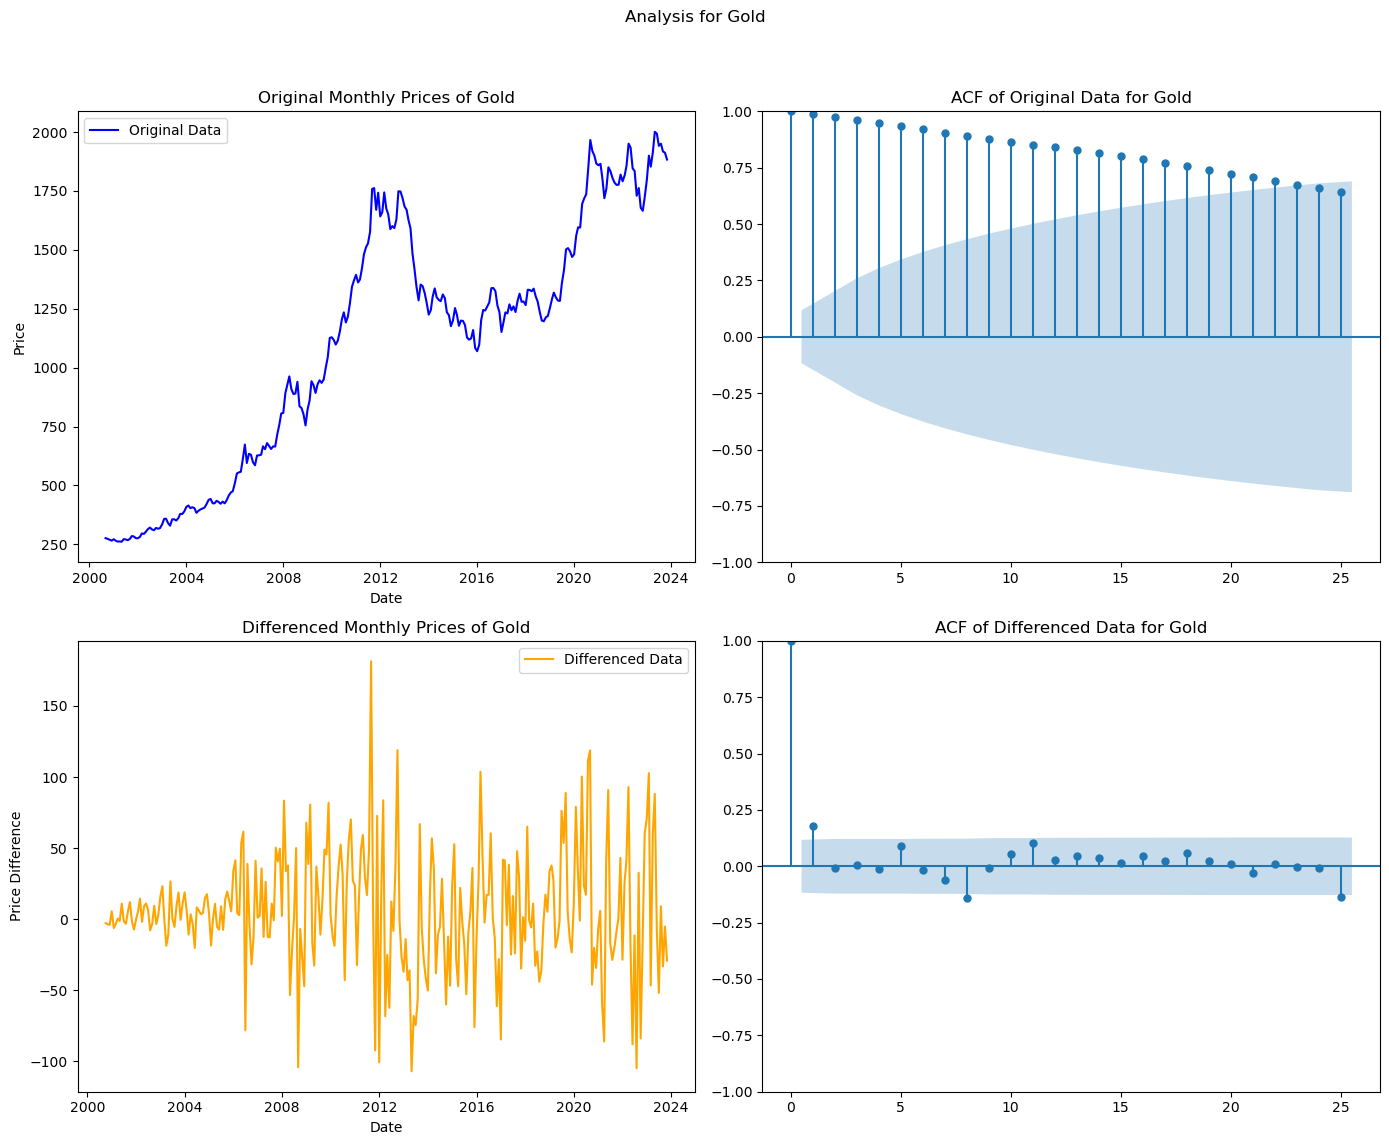

C:\Users\zhizh\AppData\Local\Temp\ipykernel_6248\2525914946.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  commodity_monthly = commodity_data.resample('M').mean()['close'].dropna()


ADF Test Result for Original Data of Gold:
{'Test Statistic': -0.8927772288614194, 'p-value': 0.7903416730224763, 'Lags Used': 1, 'Number of Observations Used': 277, 'Critical Values': {'1%': -3.4541800885158525, '5%': -2.872031361137725, '10%': -2.5723603999791473}}

ADF Test Result for Differenced Data of Gold:
{'Test Statistic': -13.811632641540697, 'p-value': 8.21074451101832e-26, 'Lags Used': 0, 'Number of Observations Used': 277, 'Critical Values': {'1%': -3.4541800885158525, '5%': -2.872031361137725, '10%': -2.5723603999791473}}

--------------------------------------------------



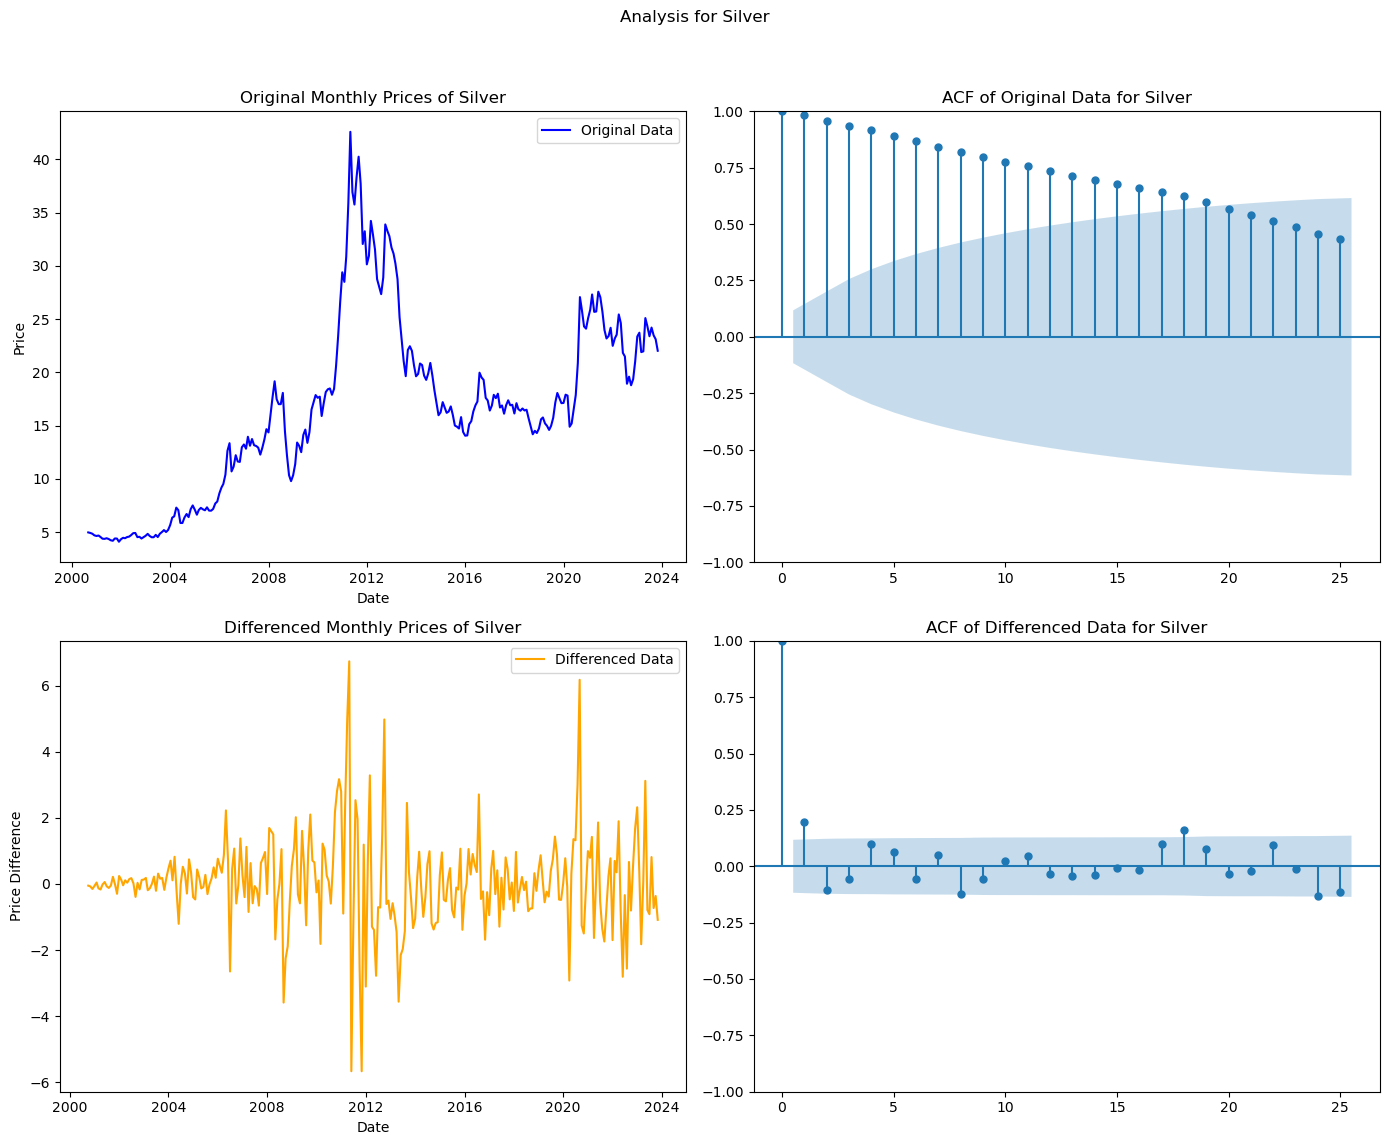

ADF Test Result for Original Data of Silver:
{'Test Statistic': -1.7861928978835453, 'p-value': 0.3873377608816597, 'Lags Used': 8, 'Number of Observations Used': 270, 'Critical Values': {'1%': -3.4548039258751206, '5%': -2.872304928618605, '10%': -2.5725063100137175}}

ADF Test Result for Differenced Data of Silver:
{'Test Statistic': -6.298085979829614, 'p-value': 3.4659427796755646e-08, 'Lags Used': 7, 'Number of Observations Used': 270, 'Critical Values': {'1%': -3.4548039258751206, '5%': -2.872304928618605, '10%': -2.5725063100137175}}

--------------------------------------------------



C:\Users\zhizh\AppData\Local\Temp\ipykernel_6248\2525914946.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  commodity_monthly = commodity_data.resample('M').mean()['close'].dropna()


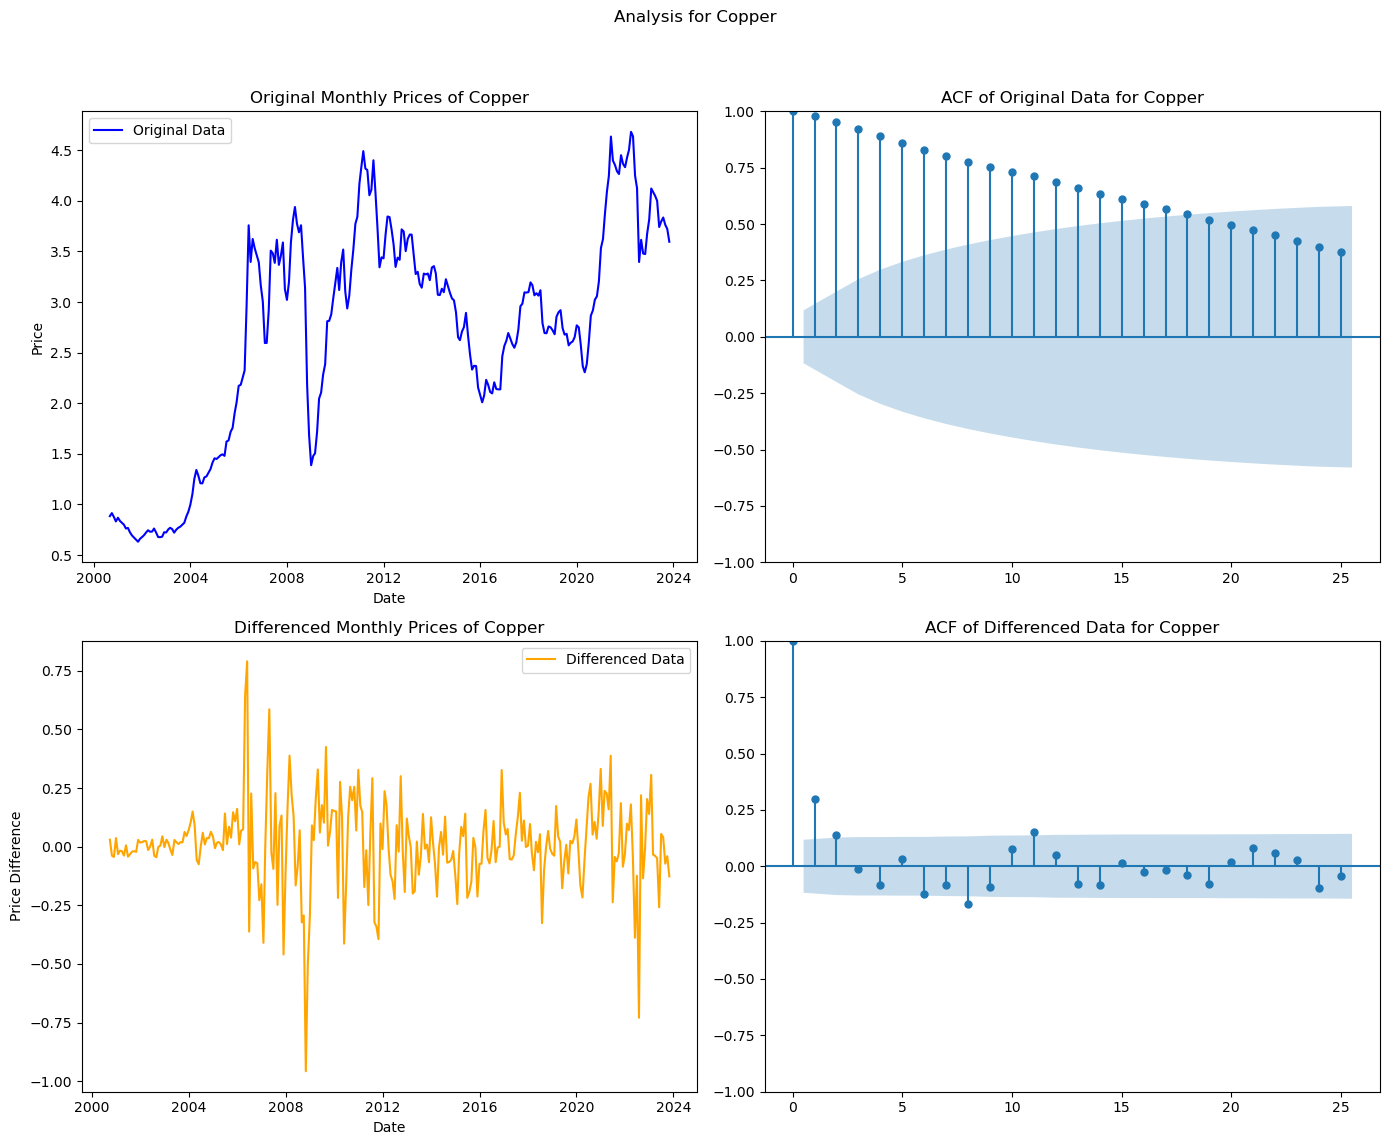

ADF Test Result for Original Data of Copper:
{'Test Statistic': -2.081209740824324, 'p-value': 0.2521370713146027, 'Lags Used': 13, 'Number of Observations Used': 265, 'Critical Values': {'1%': -3.4552699038400827, '5%': -2.8725092359464526, '10%': -2.5726152830188678}}

ADF Test Result for Differenced Data of Copper:
{'Test Statistic': -4.957687430317995, 'p-value': 2.6894959484092435e-05, 'Lags Used': 12, 'Number of Observations Used': 265, 'Critical Values': {'1%': -3.4552699038400827, '5%': -2.8725092359464526, '10%': -2.5726152830188678}}

--------------------------------------------------



C:\Users\zhizh\AppData\Local\Temp\ipykernel_6248\2525914946.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  commodity_monthly = commodity_data.resample('M').mean()['close'].dropna()


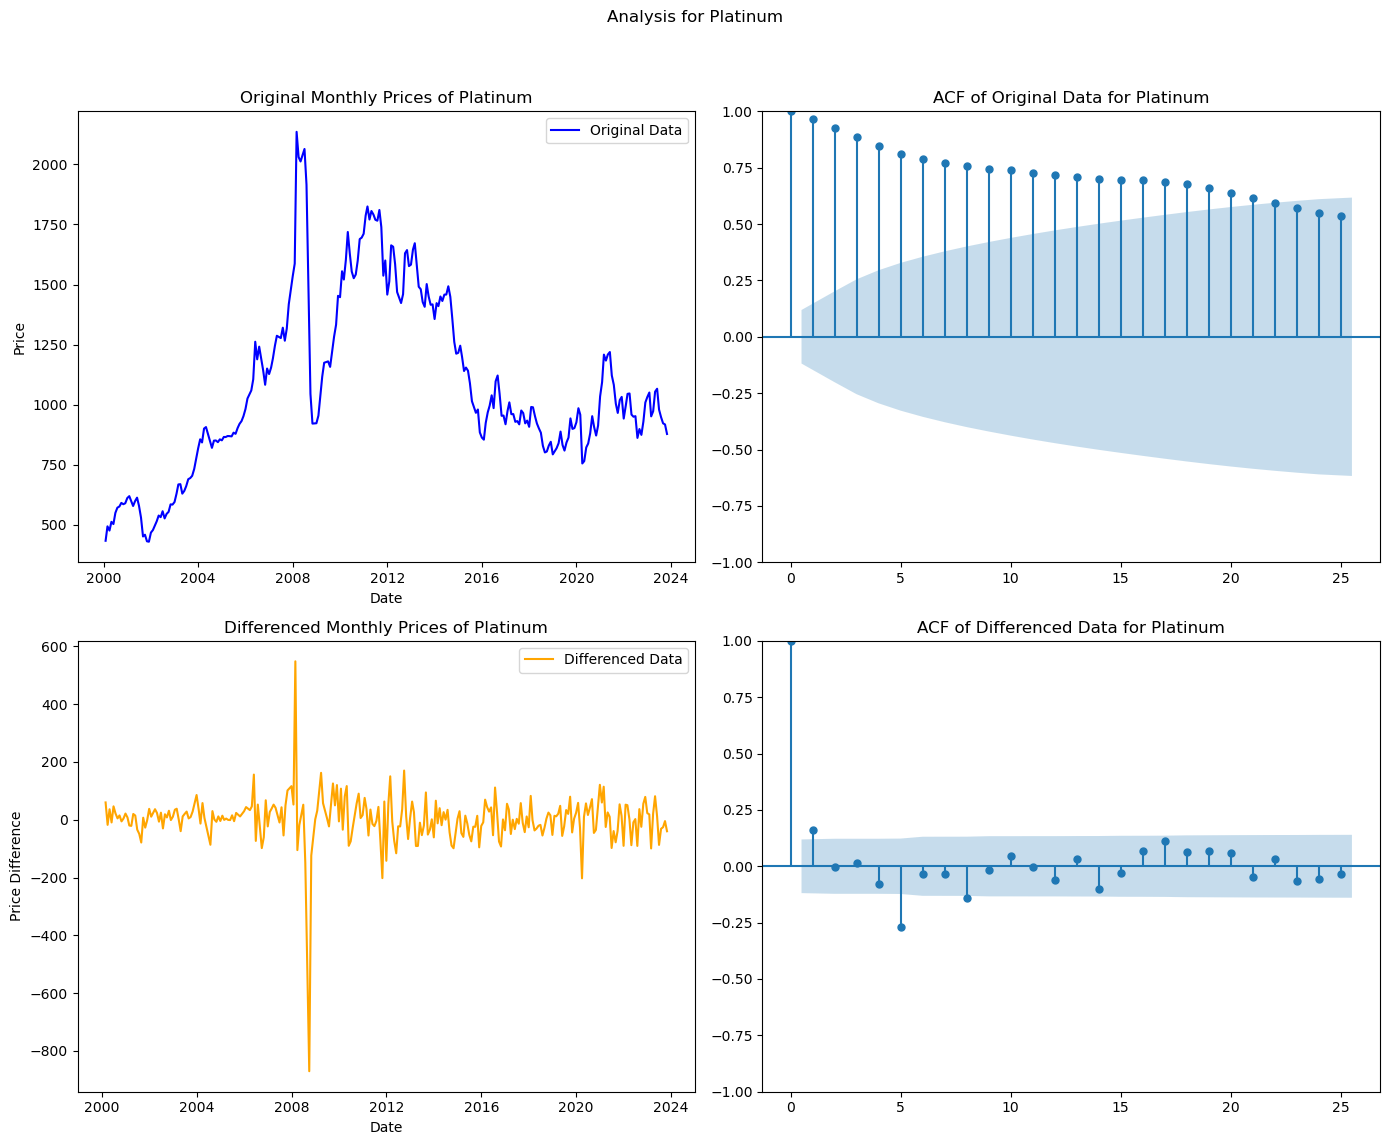

ADF Test Result for Original Data of Platinum:
{'Test Statistic': -1.9760196616552517, 'p-value': 0.2971855974021381, 'Lags Used': 5, 'Number of Observations Used': 266, 'Critical Values': {'1%': -3.455175292841607, '5%': -2.8724677563219485, '10%': -2.57259315846006}}

ADF Test Result for Differenced Data of Platinum:
{'Test Statistic': -7.657132409743088, 'p-value': 1.7270545035595682e-11, 'Lags Used': 7, 'Number of Observations Used': 263, 'Critical Values': {'1%': -3.4554613060274972, '5%': -2.8725931472675046, '10%': -2.5726600403359887}}

--------------------------------------------------



C:\Users\zhizh\AppData\Local\Temp\ipykernel_6248\2525914946.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  commodity_monthly = commodity_data.resample('M').mean()['close'].dropna()


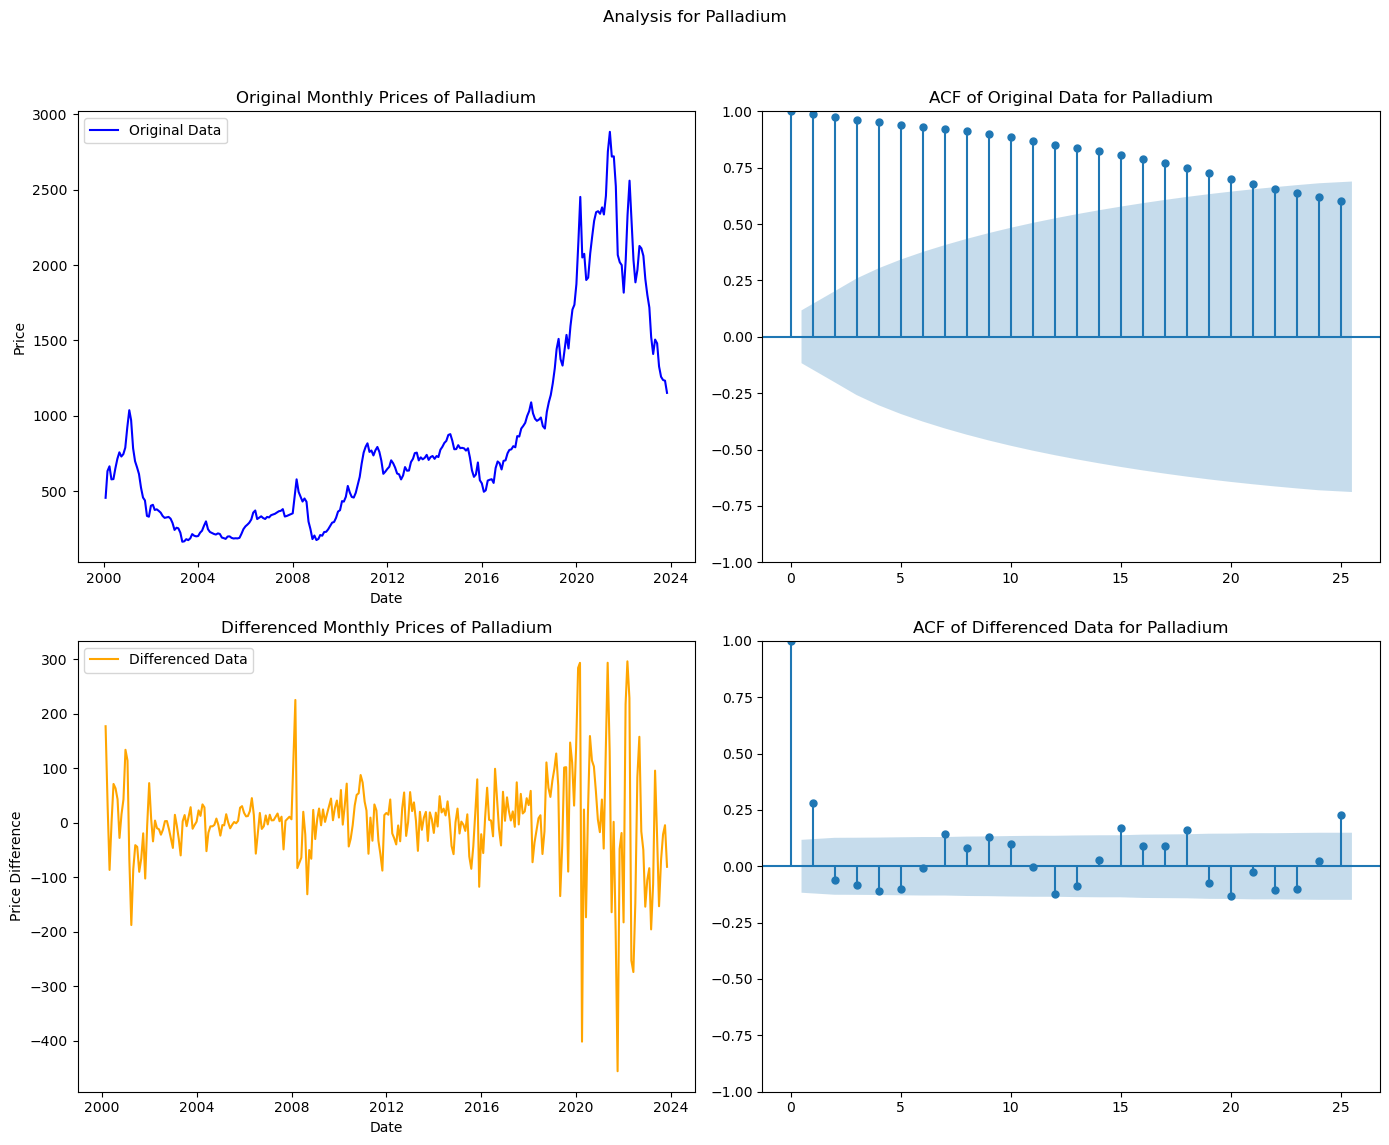

ADF Test Result for Original Data of Palladium:
{'Test Statistic': -1.847940773248458, 'p-value': 0.35693333773308367, 'Lags Used': 15, 'Number of Observations Used': 264, 'Critical Values': {'1%': -3.455365238788105, '5%': -2.8725510317187024, '10%': -2.5726375763314966}}

ADF Test Result for Differenced Data of Palladium:
{'Test Statistic': -4.4107445912896575, 'p-value': 0.0002841023082150042, 'Lags Used': 8, 'Number of Observations Used': 270, 'Critical Values': {'1%': -3.4548039258751206, '5%': -2.872304928618605, '10%': -2.5725063100137175}}

--------------------------------------------------



In [4]:
# Specified commodities for analysis
commodities = ['Gold', 'Silver', 'Copper', 'Platinum', 'Palladium']

# Conduct analysis for each commodity
for commodity in commodities:
    # Isolate data for the specific commodity
    commodity_data = data[data['commodity'] == commodity]
    commodity_data.set_index('date', inplace=True)
    commodity_monthly = commodity_data.resample('M').mean()['close'].dropna()

    # Perform ADF Test on original and differenced data
    adf_result_original = adf_test(commodity_monthly)
    commodity_monthly_diff = commodity_monthly.diff().dropna()
    adf_result_diff = adf_test(commodity_monthly_diff)

    # Plotting Original and Differenced Data with ACF
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    plt.suptitle(f'Analysis for {commodity}')

    # Original Time Series and ACF
    axes[0, 0].plot(commodity_monthly, label='Original Data', color='blue')
    axes[0, 0].set_title(f'Original Monthly Prices of {commodity}')
    axes[0, 0].set_xlabel('Date')
    axes[0, 0].set_ylabel('Price')
    axes[0, 0].legend()

    plot_acf(commodity_monthly, ax=axes[0, 1])
    axes[0, 1].set_title(f'ACF of Original Data for {commodity}')

    # Differenced Time Series and ACF
    axes[1, 0].plot(commodity_monthly_diff, label='Differenced Data', color='orange')
    axes[1, 0].set_title(f'Differenced Monthly Prices of {commodity}')
    axes[1, 0].set_xlabel('Date')
    axes[1, 0].set_ylabel('Price Difference')
    axes[1, 0].legend()

    plot_acf(commodity_monthly_diff, ax=axes[1, 1])
    axes[1, 1].set_title(f'ACF of Differenced Data for {commodity}')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # Print ADF Test Results
    print(f"ADF Test Result for Original Data of {commodity}:")
    print(adf_result_original)
    print(f"\nADF Test Result for Differenced Data of {commodity}:")
    print(adf_result_diff)
    print("\n" + "-"*50 + "\n")


In [5]:
# Load data to start fresh
data = pd.read_csv('Dataset/all_commodities_data.csv')
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

commodities = ['Gold', 'Silver', 'Copper', 'Platinum', 'Palladium']

# Forecast horizon set to 3 months
forecast_horizon = 3

# Loop through each commodity and perform naive forecasting
for commodity in commodities:
    # Extract data for the specific commodity
    commodity_data = data[data['commodity'] == commodity]['close']
    
    # Split the data into training and testing
    training_data = commodity_data['2018-01-01':'2022-12-31']
    testing_data = commodity_data['2023-01-01':'2023-10-31']
    
    # Naive forecast using the last available price for future predictions
    last_available_price = training_data.iloc[-1]
    naive_forecast = np.full(shape=len(testing_data), fill_value=last_available_price)

    # Calculate evaluation metrics
    mae = mean_absolute_error(testing_data, naive_forecast)
    mse = mean_squared_error(testing_data, naive_forecast)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((testing_data - naive_forecast) / testing_data)) * 100

    # Print results
    print(f"Naive Forecasting Results for {commodity} (2023/01-2023/03):")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}%")
    print("\n" + "-"*50 + "\n")


Naive Forecasting Results for Gold (2023/01-2023/03):
MAE: 108.71
MSE: 14768.15
RMSE: 121.52
MAPE: 5.56%

--------------------------------------------------

Naive Forecasting Results for Silver (2023/01-2023/03):
MAE: 1.08
MSE: 1.89
RMSE: 1.37
MAPE: 4.78%

--------------------------------------------------

Naive Forecasting Results for Copper (2023/01-2023/03):
MAE: 0.16
MSE: 0.04
RMSE: 0.20
MAPE: 4.04%

--------------------------------------------------

Naive Forecasting Results for Platinum (2023/01-2023/03):
MAE: 101.30
MSE: 13823.60
RMSE: 117.57
MAPE: 10.82%

--------------------------------------------------

Naive Forecasting Results for Palladium (2023/01-2023/03):
MAE: 401.53
MSE: 189841.30
RMSE: 435.71
MAPE: 30.78%

--------------------------------------------------



In [6]:
# Load your data to start fresh
data = pd.read_csv('Dataset/all_commodities_data.csv')
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Define dictionaries to store models
arima_models = {}
sarima_models = {}
exp_smoothing_models = {}
model_parameters = {}
commodities = ['Gold', 'Silver', 'Copper', 'Platinum', 'Palladium']

# Function to evaluate the forecast
def evaluate_forecast(actual_data, forecast):
    mae = mean_absolute_error(actual_data, forecast)
    mse = mean_squared_error(actual_data, forecast)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual_data - forecast) / actual_data)) * 100
    return mae, mse, rmse, mape

# Model Fitting and Evaluation
for commodity in commodities:
    try:
        # Filter data for the commodity
        commodity_data = data[data['commodity'] == commodity]
        features = ['open', 'high', 'low', 'close', 'volume']
        commodity_data = commodity_data[features]

        # Normalize/Standardize your data
        scaler = StandardScaler()
        commodity_data[features] = scaler.fit_transform(commodity_data[features])

        # Create lagged features
        n_lags = 1  # Adjust the number of lags as needed
        for feature in features:
            for lag in range(1, n_lags + 1):
                commodity_data[f'{feature}_lag_{lag}'] = commodity_data[feature].shift(lag)
        commodity_data.dropna(inplace=True)

        # Split into training and testing sets
        training_data = commodity_data['2018-01-01':'2022-12-31']
        testing_data = commodity_data['2023-01-01':'2023-03-31']

        # Fit VAR Model
        model = VAR(training_data)
        fitted_model = model.fit(maxlags=15, ic='aic')

        # Forecast
        forecast = fitted_model.forecast(training_data.values[-15:], steps=len(testing_data))

        # Evaluate the forecast
        # Adjust as necessary to align the forecast structure with your actual data
        metrics = evaluate_forecast(testing_data.values, forecast)
        print(f"{commodity} - MAE: {metrics[0]}, MSE: {metrics[1]}, RMSE: {metrics[2]}, MAPE: {metrics[3]}%")
        print("\n" + "-"*50 + "\n")

    except Exception as e:
        print(f"Error in model fitting for {commodity}: {e}")

Gold - MAE: 0.17868486481624984, MSE: 0.186918375404547, RMSE: 0.4323405780221734, MAPE: 29.0937152002937%

--------------------------------------------------



C:\Users\zhizh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\zhizh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Silver - MAE: 0.1737910690748353, MSE: 0.15675293397179693, RMSE: 0.3959203631689041, MAPE: 43.86158998341374%

--------------------------------------------------

Copper - MAE: 0.28114463938741147, MSE: 0.39753948452517535, RMSE: 0.6305073231336614, MAPE: 48.593472726741005%

--------------------------------------------------

Platinum - MAE: 0.14919031780645892, MSE: 0.05803181457956682, RMSE: 0.2408979339462396, MAPE: 73.31755903735213%

--------------------------------------------------



C:\Users\zhizh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\zhizh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Palladium - MAE: 0.37171895086480755, MSE: 0.2792775702844577, RMSE: 0.5284671894114692, MAPE: 42.691541045855914%

--------------------------------------------------



C:\Users\zhizh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [7]:
def forecast_and_evaluate(model, model_type, steps, actual_data):
    try:
        if model_type == 'arima':
            # Forecasting for pmdarima ARIMA models
            forecast = model.predict(n_periods=steps)
        elif model_type == 'sarima':
            # Forecasting for statsmodels SARIMAX models
            forecast = model.get_forecast(steps=steps).predicted_mean
        elif model_type == 'exp_smoothing':
            # Forecasting for statsmodels Exponential Smoothing models
            forecast = model.forecast(steps)
        else:
            raise ValueError(f"Unrecognized model type: {model_type}")
        
        # Evaluation Metrics
        mae = mean_absolute_error(actual_data, forecast)
        mse = mean_squared_error(actual_data, forecast)
        rmse = np.sqrt(mse)
        mape = np.mean(np.abs((actual_data - forecast) / actual_data)) * 100
        return mae, mse, rmse, mape
    except Exception as e:
        print(f"Error in forecast and evaluate: {e}")
        return None

# Model Fitting and Evaluation
for commodity in commodities:
    try:
        # Preparing Data
        commodity_data = data[data['commodity'] == commodity]
        training_data = commodity_data['2018-01-01':'2022-12-31']['close'].resample('M').mean().dropna()
        testing_data = commodity_data['2023-01-01':'2023-03-31']['close'].resample('M').mean().dropna()

        # ARIMA Model
        model_params = auto_arima(training_data, seasonal=True, m=12, suppress_warnings=True, stepwise=True)
        arima_model = model_params
        arima_models[commodity] = arima_model
        arima_metrics = forecast_and_evaluate(arima_model, 'arima', 3, testing_data)
        if arima_metrics:
            print(f"ARIMA Model for {commodity}: MAE: {arima_metrics[0]}, MSE: {arima_metrics[1]}, RMSE: {arima_metrics[2]}, MAPE: {arima_metrics[3]}%")

            model_parameters[f'{commodity}_ARIMA'] = arima_model.get_params()
            
        # SARIMA Model
        sarima_model = SARIMAX(training_data, order=model_params.order, seasonal_order=model_params.seasonal_order).fit()
        sarima_models[commodity] = sarima_model
        sarima_metrics = forecast_and_evaluate(sarima_model, 'sarima', 3, testing_data)
        if sarima_metrics:
            print(f"SARIMA Model for {commodity}: MAE: {sarima_metrics[0]}, MSE: {sarima_metrics[1]}, RMSE: {sarima_metrics[2]}, MAPE: {sarima_metrics[3]}%")
            model_parameters[f'{commodity}_SARIMA'] = {'order': sarima_model.model.order, 'seasonal_order': sarima_model.model.seasonal_order}
    
        # Exponential Smoothing Model
        exp_smoothing_model = ExponentialSmoothing(training_data, trend='add', seasonal='add', seasonal_periods=12).fit()
        exp_smoothing_models[commodity] = exp_smoothing_model
        exp_metrics = forecast_and_evaluate(exp_smoothing_model, 'exp_smoothing', 3, testing_data)
        if exp_metrics:
            print(f"Exponential Smoothing Model for {commodity}: MAE: {exp_metrics[0]}, MSE: {exp_metrics[1]}, RMSE: {exp_metrics[2]}, MAPE: {exp_metrics[3]}%")
            model_parameters[f'{commodity}_Exp_Smoothing'] = {'trend': exp_smoothing_model.model.trend, 'seasonal': exp_smoothing_model.model.seasonal, 'seasonal_periods': exp_smoothing_model.model.seasonal_periods}
        print("\n" + "-"*50 + "\n")
    except Exception as e:
        print(f"Error in model fitting for {commodity}: {e}")
        
# Print the best model parameters
for commodity in commodities:
    print(f"Parameters for {commodity} models:")
    print("ARIMA:", model_parameters.get(f'{commodity}_ARIMA', 'No model fitted'))
    print("SARIMA:", model_parameters.get(f'{commodity}_SARIMA', 'No model fitted'))
    print("Exponential Smoothing:", model_parameters.get(f'{commodity}_Exp_Smoothing', 'No model fitted'))
    print("\n" + "-"*50 + "\n")

ARIMA Model for Gold: MAE: 75.84771020923897, MSE: 6409.6122700049455, RMSE: 80.0600541469024, MAPE: 3.9981029720349746%
SARIMA Model for Gold: MAE: 75.84771020923897, MSE: 6409.6122700049455, RMSE: 80.0600541469024, MAPE: 3.9981029720349746%
Exponential Smoothing Model for Gold: MAE: 51.67374103259514, MSE: 3475.7376518831566, RMSE: 58.95538696237314, MAPE: 2.715953958858473%

--------------------------------------------------

ARIMA Model for Silver: MAE: 1.3490863370795196, MSE: 2.5305198316186774, RMSE: 1.590760771335111, MAPE: 6.132787148964792%
SARIMA Model for Silver: MAE: 1.3490863370795196, MSE: 2.5305198316186774, RMSE: 1.590760771335111, MAPE: 6.132787148964792%
Exponential Smoothing Model for Silver: MAE: 1.564396055375487, MSE: 3.190751976663666, RMSE: 1.7862676105958104, MAPE: 7.085687427497238%

--------------------------------------------------

ARIMA Model for Copper: MAE: 0.269767591912706, MSE: 0.07299245721497165, RMSE: 0.2701711628115992, MAPE: 6.6020000464140125%


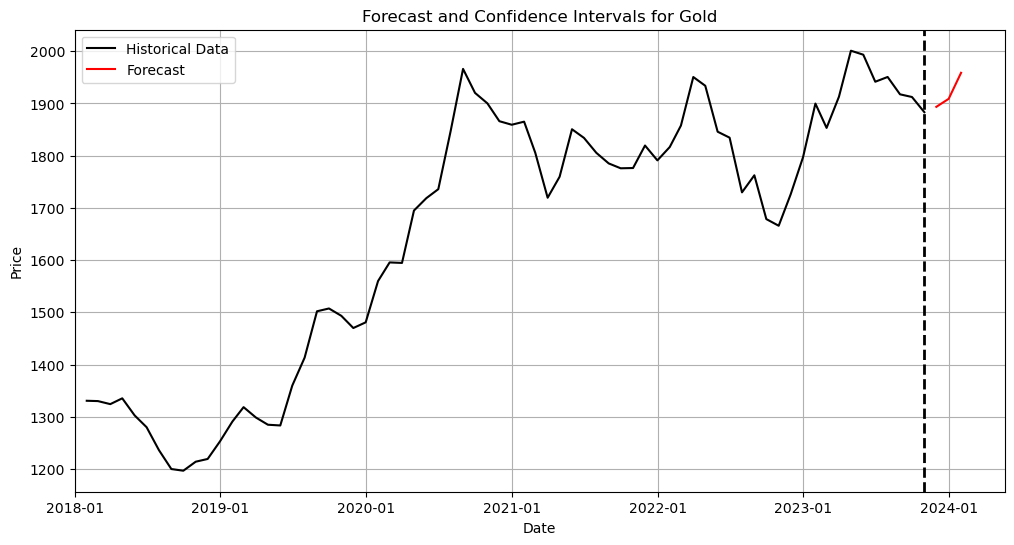

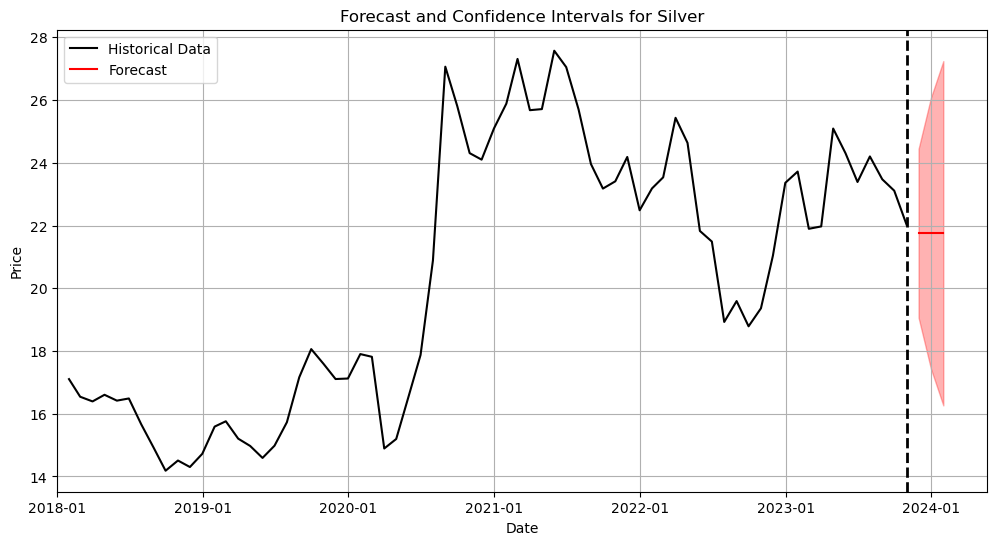

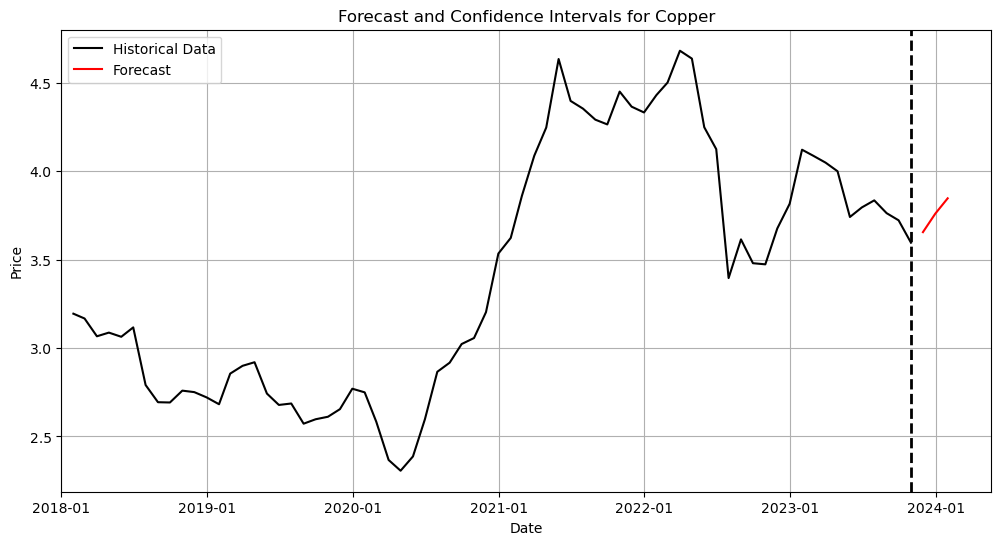

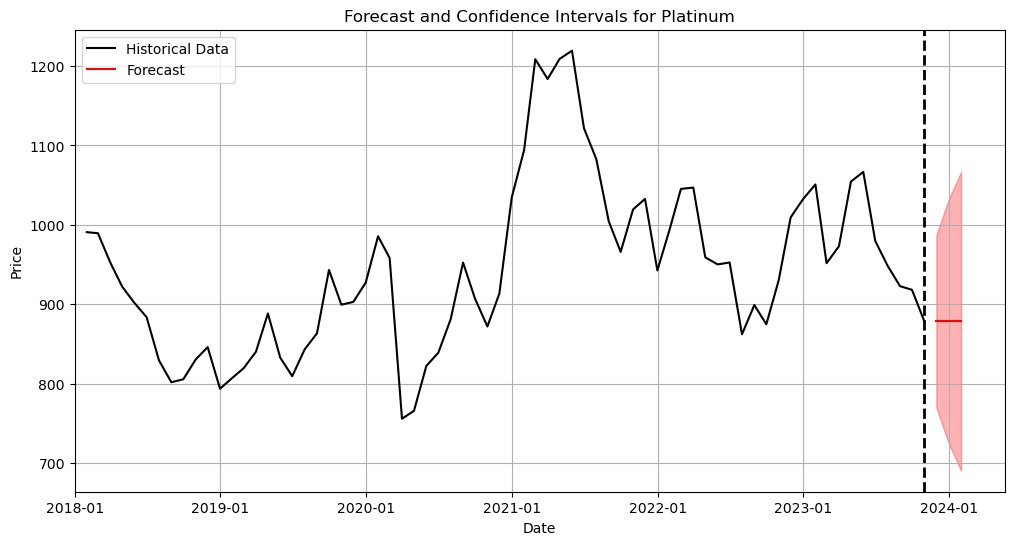

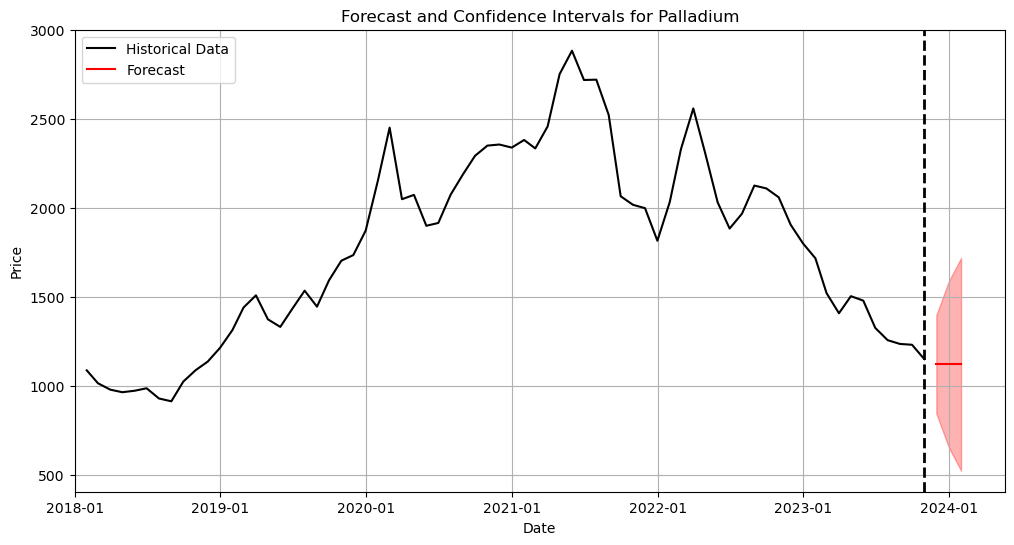

In [8]:
# Define commodities and their respective best models
commodities_parameters = {
    'Gold': {'model': 'Exp_Smoothing', 'trend': 'add', 'seasonal': 'add', 'seasonal_periods': 12},
    'Silver': {'model': 'ARIMA', 'order': (0, 1, 1)},
    'Copper': {'model': 'Exp_Smoothing', 'trend': 'add', 'seasonal': 'add', 'seasonal_periods': 12},
    'Platinum': {'model': 'ARIMA', 'order': (0, 1, 0)},
    'Palladium': {'model': 'ARIMA', 'order': (0, 1, 1)}
}

# Training and prediction timeframes
training_start = '2018-01-01'
training_end = '2023-10-20'
prediction_start = '2023-10-21'
prediction_end = '2024-02-28'
forecast_horizon = 3  # December 2023 to February 2024

# Function to fit and forecast
def fit_and_forecast(commodity, params):
    # Extracting data for the specified commodity
    commodity_data = data[data['commodity'] == commodity]

    # Slicing the data for the training period
    training_data = commodity_data[training_start:training_end]['close'].resample('M').mean()

    # Fit the specified model
    if params['model'] == 'ARIMA':
        model = ARIMA(training_data, order=params['order']).fit()
        forecast_result = model.get_forecast(steps=forecast_horizon)
        predicted_mean = forecast_result.predicted_mean
        conf_int = forecast_result.conf_int()
    else:  # Exponential Smoothing
        model = ExponentialSmoothing(training_data, trend=params['trend'], seasonal=params['seasonal'], seasonal_periods=params['seasonal_periods']).fit()
        predicted_mean = model.forecast(steps=forecast_horizon)
        conf_int = None

    return predicted_mean, conf_int, model

# Plotting the fan chart for each commodity
for commodity, params in commodities_parameters.items():
    predicted_mean, conf_int, model = fit_and_forecast(commodity, params)
    commodity_data = data[data['commodity'] == commodity]
    historical_data = commodity_data[training_start:training_end]['close'].resample('M').mean()
    forecast_index = pd.date_range(start=historical_data.index[-1], periods=forecast_horizon + 1, freq='M')[1:]
    plt.figure(figsize=(12, 6))
    plt.plot(historical_data.index, historical_data, label='Historical Data', color='black')
    plt.plot(forecast_index, predicted_mean, label='Forecast', color='red')

    # Plot ARIMA confidence intervals
    if conf_int is not None and params['model'] == 'ARIMA':
        plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='red', alpha=0.3)

    plt.axvline(x=historical_data.index[-1], color='black', linestyle='--', linewidth=2)
    plt.grid(True)
    plt.title(f'Forecast and Confidence Intervals for {commodity}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()

    # Set the x-axis to start from January 2018
    plt.xlim(left=pd.Timestamp('2018-01-01'))

    # Format the date on the x-axis for better readability
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())

    plt.show()


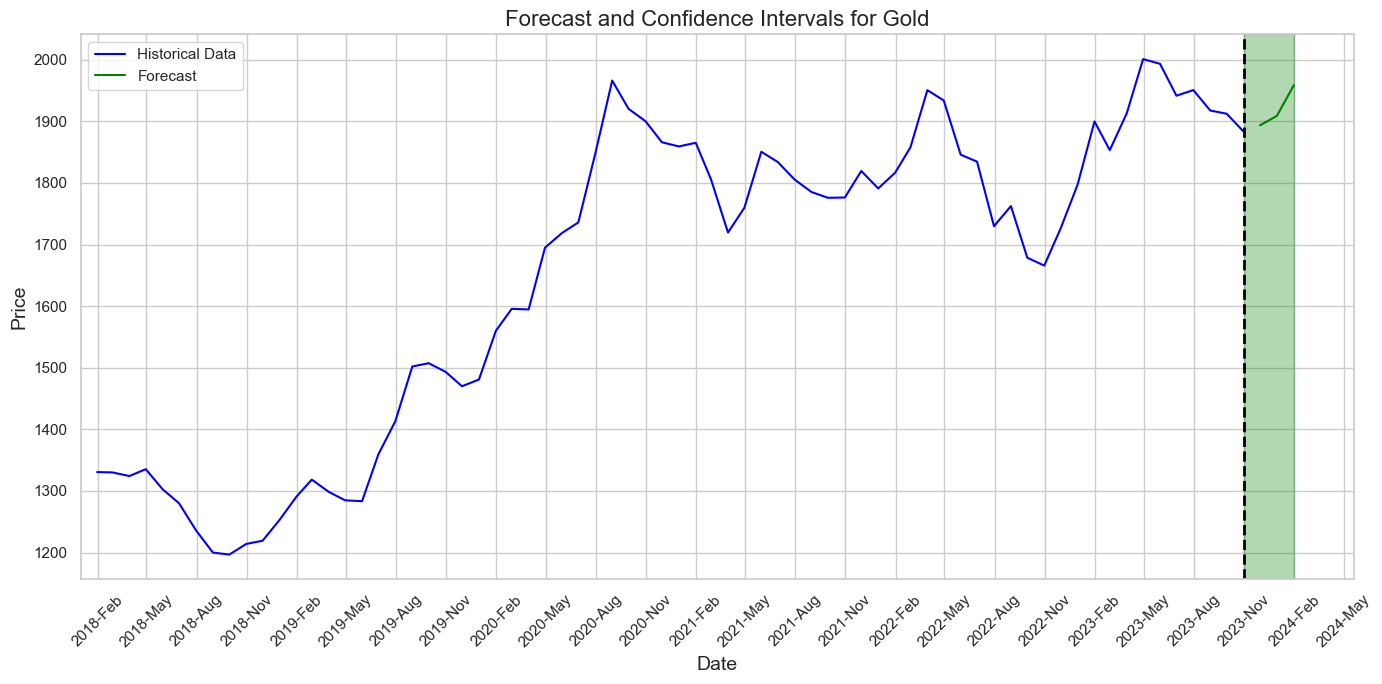

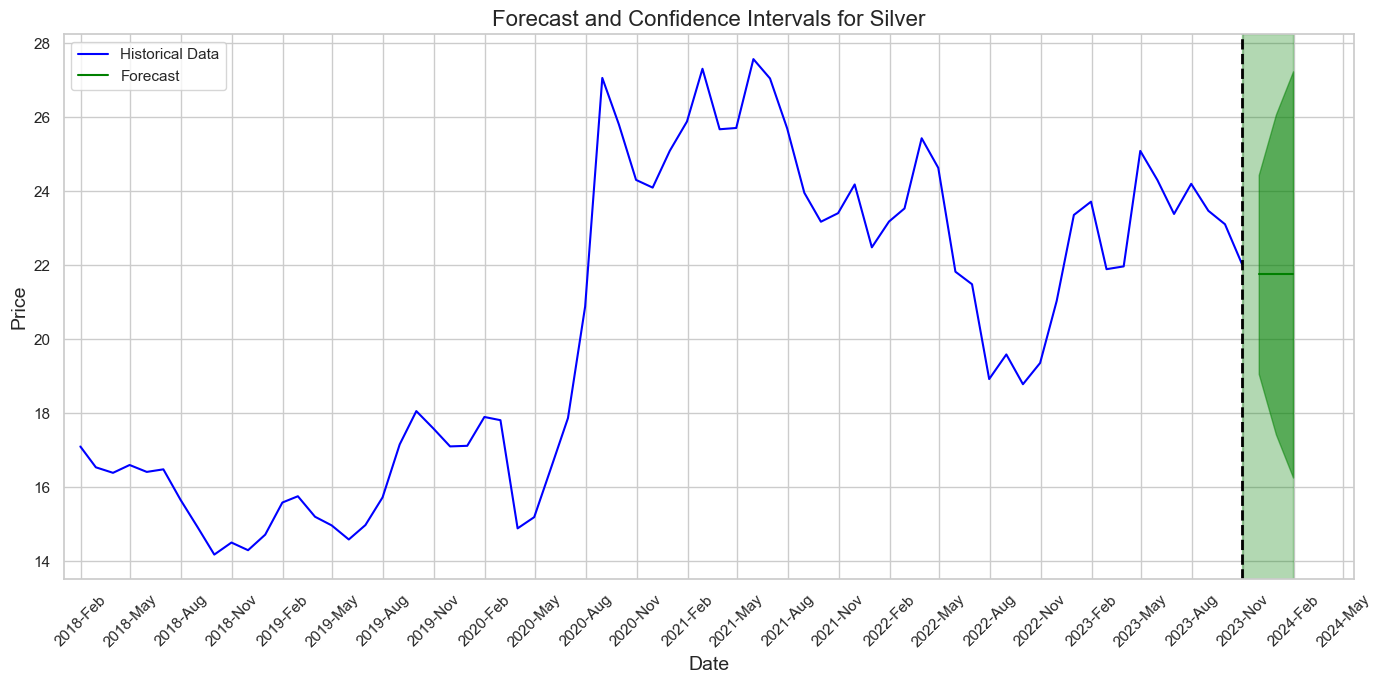

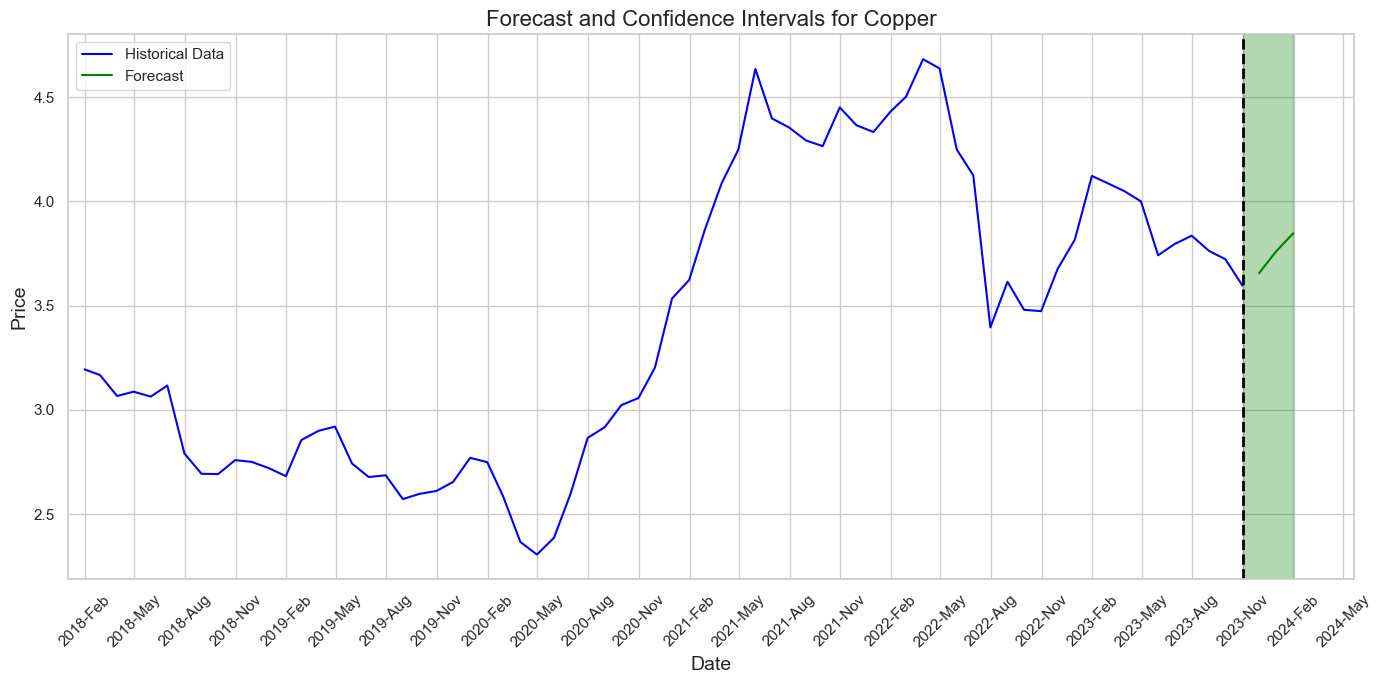

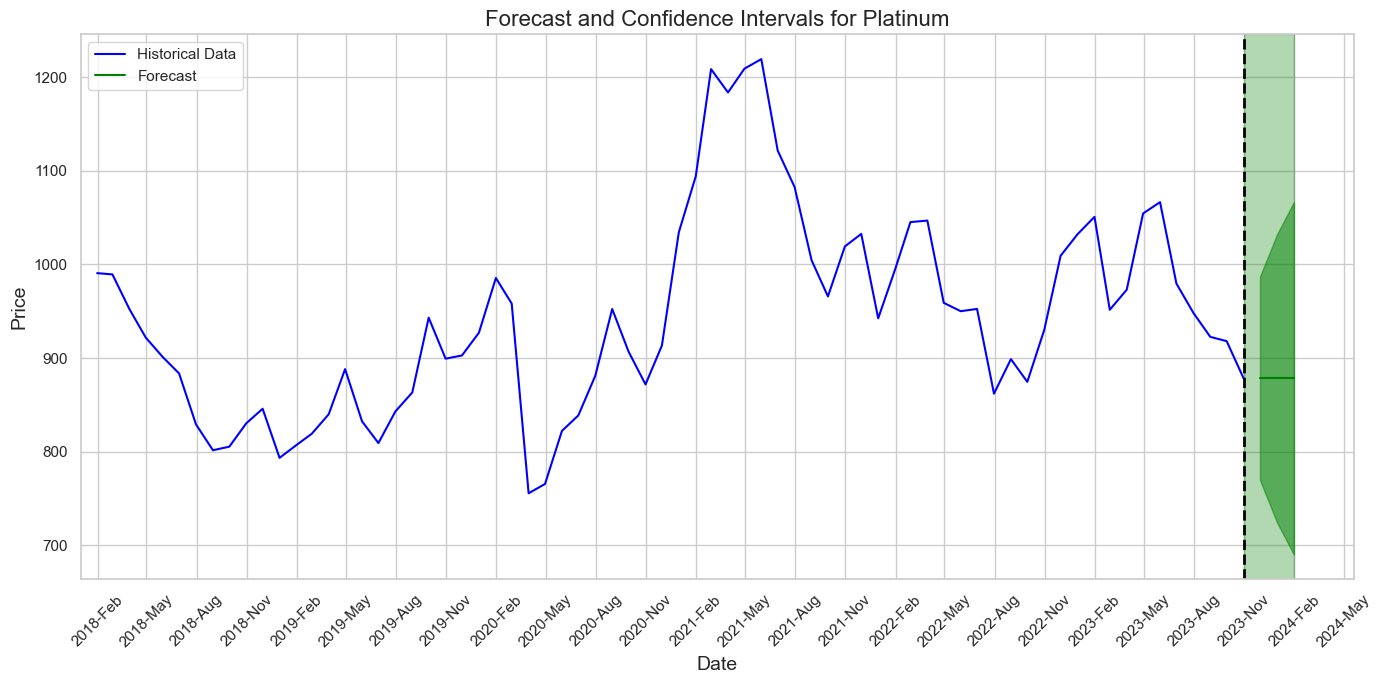

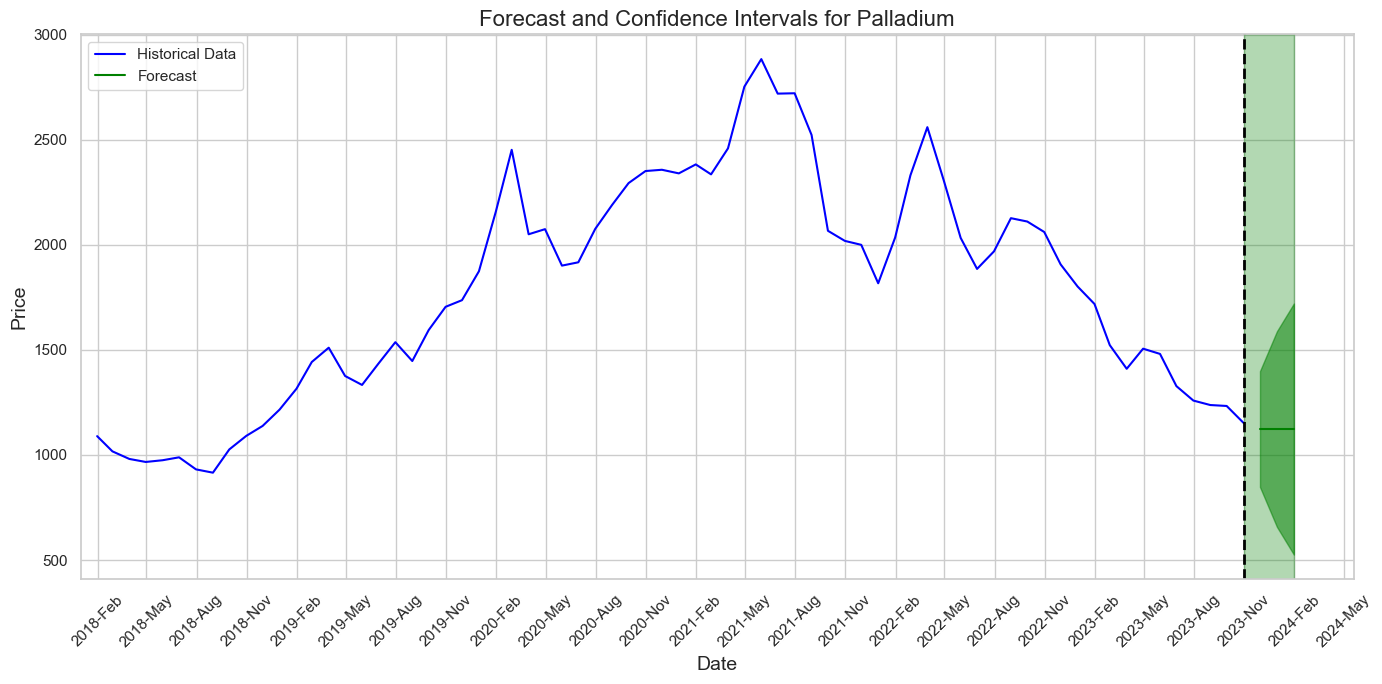

In [9]:
# Set the Seaborn style
sns.set(style="whitegrid")

# Plotting the fan chart for each commodity
for commodity, params in commodities_parameters.items():
    predicted_mean, conf_int, model = fit_and_forecast(commodity, params)
    historical_data = data[data['commodity'] == commodity]['2018-01-01':training_end]['close'].resample('M').mean()
    forecast_index = pd.date_range(start=historical_data.index[-1], periods=forecast_horizon + 1, freq='M')[1:]

    plt.figure(figsize=(14, 7))
    plt.plot(historical_data.index, historical_data, label='Historical Data', color='blue')
    plt.plot(forecast_index, predicted_mean, label='Forecast', color='green')

    # Highlight the forecast area
    plt.axvspan(historical_data.index[-1], forecast_index[-1], color='green', alpha=0.3)

    # Plot ARIMA confidence intervals
    if conf_int is not None and params['model'] == 'ARIMA':
        plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='green', alpha=0.5)

    plt.axvline(x=historical_data.index[-1], color='black', linestyle='--', linewidth=2)
    plt.title(f'Forecast and Confidence Intervals for {commodity}', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Price', fontsize=14)
    plt.legend()

    # Set the x-axis to start from January 2018 and customize ticks
    plt.xlim(left=pd.Timestamp('2018-01-01'))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [10]:
# Training end and forecast horizon
training_end = '2023-11-30'
forecast_horizon = 4

def generate_forecast(training_data, params):
    if params['model'] == 'ARIMA':
        model = ARIMA(training_data, order=params['order']).fit()
        forecast = model.get_forecast(steps=forecast_horizon)
        predicted_mean = forecast.predicted_mean
        conf_int = forecast.conf_int(alpha=0.05)  # 95% confidence interval
    else:
        model = ExponentialSmoothing(training_data, trend=params['trend'], seasonal=params['seasonal'], seasonal_periods=params['seasonal_periods']).fit()
        fitted_values = model.fittedvalues
        residuals = training_data - fitted_values
        std_error = np.std(residuals)

        predicted_mean = model.forecast(steps=forecast_horizon)
        conf_int = []
        for i in range(1, forecast_horizon + 1):
            error_margin = 1.96 * std_error * np.sqrt(i)  # Increasing error for longer forecasts
            lower_bound = predicted_mean[i - 1] - error_margin
            upper_bound = predicted_mean[i - 1] + error_margin
            conf_int.append((lower_bound, upper_bound))

    return predicted_mean, conf_int

# Print forecasted prices and confidence intervals
for commodity, params in commodities_parameters.items():
    commodity_data = data[data['commodity'] == commodity]
    training_data = commodity_data[:training_end]['close'].resample('M').mean()
    
    predicted_prices, conf_intervals = generate_forecast(training_data, params)
    
    print(f"Forecasted Prices for {commodity}:")
    for i, date in enumerate(predicted_prices.index):
        price = predicted_prices.iloc[i]
        
        # Adjust based on the structure of conf_intervals
        if isinstance(conf_intervals, list):
            lower_bound, upper_bound = conf_intervals[i]
        elif isinstance(conf_intervals, pd.DataFrame):
            lower_bound = conf_intervals.iloc[i]['lower close']
            upper_bound = conf_intervals.iloc[i]['upper close']
        else:
            # Handle other types if necessary
            pass

        print(f"  {date.date()}: {price:.2f} (95% CI: {lower_bound:.2f} to {upper_bound:.2f})")
    print()


Forecasted Prices for Gold:
  2023-11-30: 1887.83 (95% CI: 1806.84 to 1968.81)
  2023-12-31: 1888.15 (95% CI: 1773.62 to 2002.67)
  2024-01-31: 1912.18 (95% CI: 1771.92 to 2052.45)
  2024-02-29: 1925.14 (95% CI: 1763.18 to 2087.11)

Forecasted Prices for Silver:
  2023-11-30: 21.76 (95% CI: 19.08 to 24.45)
  2023-12-31: 21.76 (95% CI: 17.47 to 26.06)
  2024-01-31: 21.76 (95% CI: 16.32 to 27.21)
  2024-02-29: 21.76 (95% CI: 15.37 to 28.16)

Forecasted Prices for Copper:
  2023-11-30: 3.58 (95% CI: 3.23 to 3.92)
  2023-12-31: 3.61 (95% CI: 3.12 to 4.11)
  2024-01-31: 3.65 (95% CI: 3.05 to 4.25)
  2024-02-29: 3.70 (95% CI: 3.00 to 4.39)

Forecasted Prices for Platinum:
  2023-11-30: 878.39 (95% CI: 732.58 to 1024.21)
  2023-12-31: 878.39 (95% CI: 672.18 to 1084.61)
  2024-01-31: 878.39 (95% CI: 625.83 to 1130.95)
  2024-02-29: 878.39 (95% CI: 586.76 to 1170.02)

Forecasted Prices for Palladium:
  2023-11-30: 1123.78 (95% CI: 968.96 to 1278.61)
  2023-12-31: 1123.78 (95% CI: 863.63 to 1383